<a href="https://colab.research.google.com/github/fendy07/customer-churn-ML/blob/main/Customer_Churn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Using Machine Learning Algorithms**

## **Install Kaggle**

In [ ]:
!pip -q install kaggle

In [ ]:
# Buat direktori folder untuk kaggle
!mkdir ~/.kaggle

In [ ]:
# Load file kaggle.json dalam Google Drive
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

## **Download Dataset Dari Kaggle**



In [ ]:
# Download dataset dari kaggle dan simpan dalam folder google drive
!kaggle datasets download gauravtopre/bank-customer-churn-dataset -p /content/drive/MyDrive/Proyek/Data

In [ ]:
# Unzip file dataset berdasarkan path folder cloud drive
!unzip /content/drive/MyDrive/Proyek/Data/bank-customer-churn-dataset.zip -d /content/drive/MyDrive/Proyek/Data

## **Import Library**

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Proyek/Data/Bank Customer Churn Prediction.csv')
data.head(10)

customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619   France  Female   42       2       0.00   
1     15647311           608    Spain  Female   41       1   83807.86   
2     15619304           502   France  Female   42       8  159660.80   
3     15701354           699   France  Female   39       1       0.00   
4     15737888           850    Spain  Female   43       2  125510.82   
5     15574012           645    Spain    Male   44       8  113755.78   
6     15592531           822   France    Male   50       7       0.00   
7     15656148           376  Germany  Female   29       4  115046.74   
8     15792365           501   France    Male   44       4  142051.07   
9     15592389           684   France    Male   27       2  134603.88   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
5                2            1              0         149756.71      1  
6                2            1              1          10062.80      0  
7                4            1              0         119346.88      1  
8                2            0              1          74940.50      0  
9                1            1              1          71725.73      0

In [3]:
# Periksa 10 data baris terakhir
data.tail(10)

customer_id  credit_score  country  gender  age  tenure    balance  \
9990     15798964           714  Germany    Male   33       3   35016.60   
9991     15769959           597   France  Female   53       4   88381.21   
9992     15657105           726    Spain    Male   36       2       0.00   
9993     15569266           644   France    Male   28       7  155060.41   
9994     15719294           800   France  Female   29       2       0.00   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
9990                1            1              0          53667.08      0  
9991                1            1              0          69384.71      1  
9992                1            1              0         195192.40      0  
9993                1            1              0          29179.52      0  
9994                2            0              0         167773.55      0  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0

In [4]:
# Periksa informasi pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
# Periksa bentuk dataset
data.shape

(10000, 12)

Dataset yang dimiliki ada 10000 baris dengan 12 kolom. Dengan penjelasan tiap kolom sebagai berikut:

*   `customer_id`     : ID pelanggan (Variabel data yang tidak digunakan).
*   `credit_score`    : Skor kredit pelanggan
*   `country`         : Negara domisili pelanggan
*   `gender`          : Jenis kelamin pelanggan
*   `age`             : Umur pelanggan
*   `tenure`          : Tenor yang dimiliki pelanggan
*   `balance`         : Saldo yang dimiliki pelanggan
*   `products_number` : Nomor produk yang digunakan pelanggan
*   `credit_card`     : Kartu kredit yang dimiliki
*   `active_member`   : Apakah kartu member pelanggan aktif?
*   `estimated_salary`: Estimasi gaji yang dimiliki pelanggan?
*   `churn`           : Apakah pelanggan akan Churn atau tidak? **Jika iya maka dengan nilai 1 dan jika tidak maka dengan nilai 0**

## **Exploratory Data Analysis**

In [6]:
# Periksa apakah data terdapat kekosongan?
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
# Apakah data terdapat duplikasi?
data.duplicated().sum()

np.int64(0)

In [8]:
# Periksa apakah data terdapat nilai null?
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
# Analisis statistik deskriptif
data.describe().T

count          mean           std          min  \
customer_id       10000.0  1.569094e+07  71936.186123  15565701.00   
credit_score      10000.0  6.505288e+02     96.653299       350.00   
age               10000.0  3.892180e+01     10.487806        18.00   
tenure            10000.0  5.012800e+00      2.892174         0.00   
balance           10000.0  7.648589e+04  62397.405202         0.00   
products_number   10000.0  1.530200e+00      0.581654         1.00   
credit_card       10000.0  7.055000e-01      0.455840         0.00   
active_member     10000.0  5.151000e-01      0.499797         0.00   
estimated_salary  10000.0  1.000902e+05  57510.492818        11.58   
churn             10000.0  2.037000e-01      0.402769         0.00   

                          25%           50%           75%          max  
customer_id       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
credit_score           584.00  6.520000e+02  7.180000e+02       850.00  
age                     32.00  3.700000e+01  4.400000e+01        92.00  
tenure                   3.00  5.000000e+00  7.000000e+00        10.00  
balance                  0.00  9.719854e+04  1.276442e+05    250898.09  
products_number          1.00  1.000000e+00  2.000000e+00         4.00  
credit_card              0.00  1.000000e+00  1.000000e+00         1.00  
active_member            0.00  1.000000e+00  1.000000e+00         1.00  
estimated_salary     51002.11  1.001939e+05  1.493882e+05    199992.48  
churn                    0.00  0.000000e+00  0.000000e+00         1.00

In [10]:
# Hapus kolom data customer_id
data.drop(['customer_id'], axis = 1, inplace = True)
# Ambil sampel data sebanyak 20 baris
data.sample(20)

credit_score  country  gender  age  tenure    balance  products_number  \
1812           850  Germany  Female   33       7  134678.13                1   
9881           687    Spain  Female   40       1       0.00                2   
9891           680   France    Male   49      10       0.00                2   
286            602    Spain    Male   29       5  103907.28                1   
2355           569    Spain  Female   42       1       0.00                1   
5803           526    Spain    Male   38       2       0.00                2   
225            670   France    Male   37       4  170557.91                2   
6048           707   France  Female   36       6       0.00                1   
8020           850   France  Female   46       2  157866.77                1   
869            435   France    Male   36       4       0.00                1   
7913           805  Germany    Male   24       6  143221.35                2   
3198           544   France    Male   23       1   96471.20                1   
4756           785   France  Female   39       1  130147.98                1   
4012           554    Spain    Male   46       4       0.00                2   
1796           555   France    Male   37       9  124969.13                1   
7211           639   France  Female   37       4  116121.84                2   
3348           825   France    Male   40       6  132308.22                1   
9035           535   France    Male   45       2       0.00                2   
7604           691   France  Female   60       6  101070.69                1   
8931           678   France  Female   55       5       0.00                1   

      credit_card  active_member  estimated_salary  churn  
1812            1              0         113177.95      0  
9881            1              0           8207.36      0  
9891            1              0         187008.45      0  
286             1              0         161229.84      0  
2355            1              1          83629.60      1  
5803            0              0          58010.98      0  
225             1              0         198252.88      0  
6048            0              0          98810.78      0  
8020            1              1          18986.12      0  
869             1              1         197015.20      0  
7913            1              0         186035.72      0  
3198            1              0          35550.97      0  
4756            1              0         163798.41      1  
4012            0              1          57320.92      0  
1796            1              0          60194.05      0  
7211            0              1         181850.74      0  
3348            0              0         117122.50      0  
9035            1              0         125658.28      0  
7604            1              0         177355.80      1  
8931            0              1         196794.11      1

### **Data Visualization**

In [11]:
# Lakukan groupby pada bagian kolom data churn untuk melihat hasil Churn
dataChurn = data.groupby('churn').count()
# Visualisasi data dengan plot Pie Chart
fig = px.pie(dataChurn, values = 'active_member', names = dataChurn.index, title = 'Persentase Pelanggan Aktif vs Churn')
fig.show()

Dalam visualisasi yang ditampilkan diatas menunjukkan bahwa di dalam dataset ada dua kelompok pelanggan yaitu **20.4% pelanggan yang sudah churn dan sisanya 79.6% adalah pelanggan yang masih aktif berdasarkan active member Bank tersebut**.

In [12]:
# Visualisasi distplot pada kolom credit score
fig = px.histogram(data, x = 'credit_score', color = 'churn', title = 'Skor Kredit Pelanggan')
fig.show()

In [13]:
# Periksa jumlah churn
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [14]:
# Visualisasi histogram plot pada bagian kolom age dan balance untuk identifikasi churn
fig = px.histogram(data, x = 'age', y = 'balance', color = 'churn', title = 'Identifikasi Churn Pelanggan')
fig.show()

In [15]:
# Identifikasi jumlah pelanggan berdasarkan jenis kelamin
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
# Periksa pada kolom Country
data['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
# Ubah bagian kolom country dan gender menjadi angka
data['country'] = data['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

In [19]:
# Ubah format kolom balance dan estimated salary menjadi integer
data['balance'] = data['balance'].astype(int)
data['estimated_salary'] = data['estimated_salary'].astype(int)

# Periksa hasil perubahan dengan sampel sebanyak 10 baris
data.sample(10)

credit_score  country  gender  age  tenure  balance  products_number  \
5800           599        0       1   30       9   105443                1   
3389           420        2       0   55       4    91893                1   
3714           823        0       1   34       3   105057                1   
2056           539        2       1   38       6        0                1   
1257           628        0       0   38       3        0                2   
4534           656        0       1   41       2        0                2   
8980           650        1       0   35       3   165982                2   
9005           745        2       0   38       7        0                2   
7314           588        0       0   36       2        0                2   
1190           797        0       0   29       1        0                2   

      credit_card  active_member  estimated_salary  churn  
5800            1              1            121124      0  
3389            1              0            144870      1  
3714            1              0              9217      0  
2056            1              1            152880      1  
1257            1              1             48924      0  
4534            1              0            158973      0  
8980            1              1             24482      0  
9005            1              1            194230      0  
7314            1              0             92536      1  
1190            1              1            132975      0

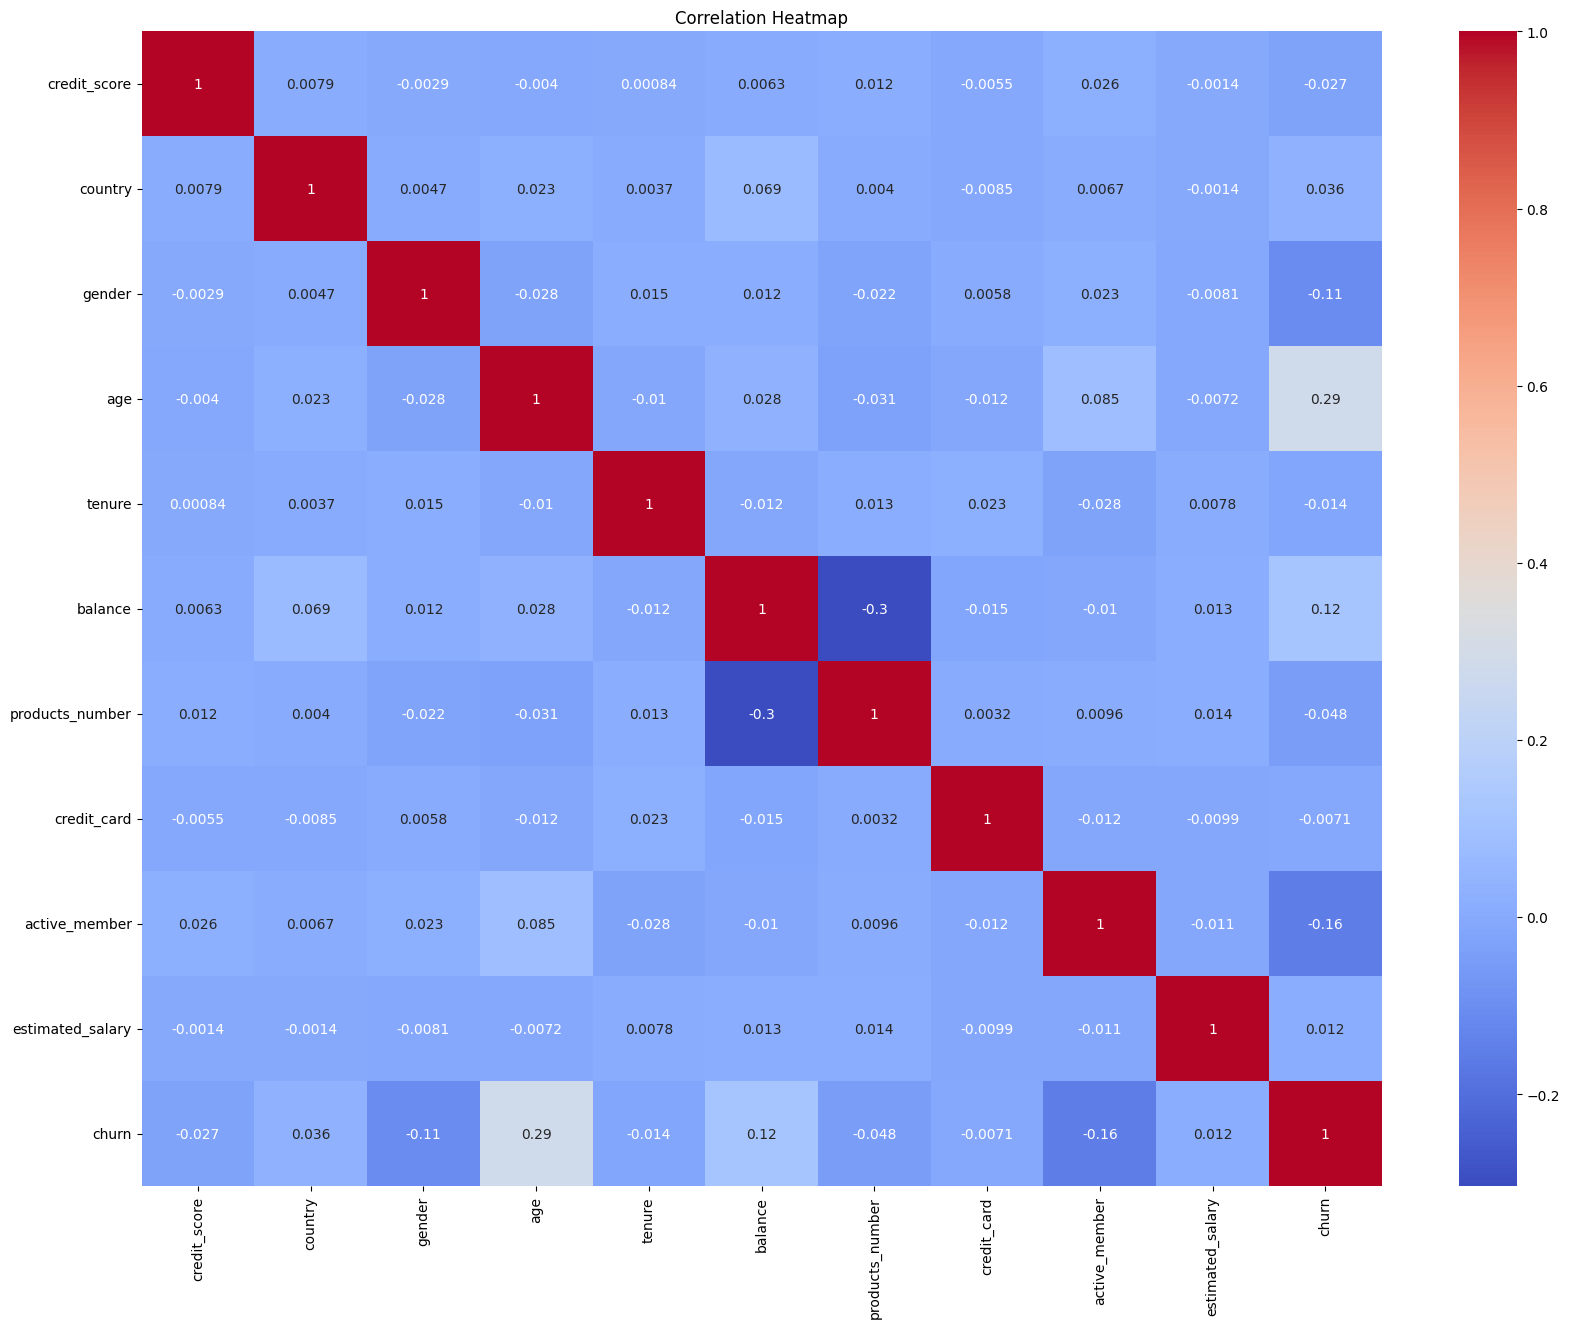

In [20]:
# Visualisasi Pearson Correlation
correlation_matrix = data.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan visualisasi heatmap pada Pearson Correlation diatas menunjukkan bahwa feature kolom `balance` dan `age` memiliki nilai korelasi yang positif dengan kolom data `churn` sebagai variabel data target. Sedangkan untuk kolom yang lain ada beberapa kolom yang memiliki nilai korelasi negatif.

In [21]:
# Visualisasi boxplot pada kolom products number dan balance
fig = px.box(data, x = 'products_number', y = 'balance', color = 'churn', title = '')
fig.show()

In [22]:
# Visualisasi scatterplot pada data kolom balance dan country
fig = px.scatter(data, x = 'balance', y = 'country', color = 'churn', title = 'Persebaran Pola Saldo Pelanggan Berdasarkan Negara')
fig.show()

### **Feature Selection**

In [23]:
# Lakukan pemilihan data kolom fitur dan target
X = data.drop(['churn'], axis = 1)
y = data['churn']

In [24]:
X.shape

(10000, 10)

In [25]:
y.shape

(10000,)

In [26]:
# Pisahkan dataset dengan rasio 80:20 (80% Training dan 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)
print('Data Training : ', X_train.shape, y_train.shape)
print('Data Testing  : ', X_test.shape, y_test.shape)

Data Training :  (8000, 10) (8000,)
Data Testing  :  (2000, 10) (2000,)


### **Feature Engineering**

In [27]:
# Lakukan perubahan data dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[ 1.058568  , -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  ,  1.04209111],
       [ 0.91362605,  0.30016846,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.62355425],
       [ 1.07927399,  0.30016846, -1.10191942, ...,  0.64104192,
         0.97067965,  0.308132  ],
       ...,
       [ 0.16821031, -0.90593285, -1.10191942, ...,  0.64104192,
         0.97067965, -0.5580929 ],
       [ 0.37527024,  1.50626978,  0.90750738, ...,  0.64104192,
        -1.030206  , -1.35149573],
       [ 1.56586482,  1.50626978,  0.90750738, ..., -1.55996038,
         0.97067965, -1.02692739]])

In [29]:
X_test

array([[-0.68073539, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.09501439],
       [-1.30191518,  0.30016846,  0.90750738, ..., -1.55996038,
        -1.030206  , -0.77894867],
       [-0.97061929,  1.50626978, -1.10191942, ..., -1.55996038,
         0.97067965,  0.09946846],
       ...,
       [-1.39509214,  0.30016846, -1.10191942, ..., -1.55996038,
        -1.030206  ,  0.87009151],
       [ 0.39597623, -0.90593285,  0.90750738, ..., -1.55996038,
        -1.030206  , -1.47934859],
       [ 1.02750901, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.49531767]])

## **Modelling**

### **Logistic Regression**

In [30]:
# Pemodelan dengan algoritma Logistic Regression
lr_clf = LogisticRegression(penalty = 'l2', C = 0.01)
lr_clf.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [31]:
lr_pred = lr_clf.predict(X_test)
lr_pred

array([0, 0, 0, ..., 1, 0, 0])

### **Decision Tree**

In [32]:
# Pemodelan dengan algoritma Decision Tree
dt_clf = DecisionTreeClassifier(min_samples_split=2,
                                min_samples_leaf=1,
                                criterion = 'gini')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
dt_pred = dt_clf.predict(X_test)
dt_pred

array([0, 0, 0, ..., 1, 0, 0])

### **Random Forest**

In [34]:
# Pemodelan dengan algoritma Random Forest
rf_clf = RandomForestClassifier(n_estimators = 100,
                                criterion = 'gini',
                                min_samples_split = 2,
                                min_samples_leaf = 1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf_pred = rf_clf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 1, 0, 0])

## **Evaluation**

### **Classification Report**

In [36]:
# Evaluasi dengan Classification Report model Logistic Regression
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1593
           1       0.62      0.12      0.19       407

    accuracy                           0.81      2000
   macro avg       0.72      0.55      0.54      2000
weighted avg       0.77      0.81      0.75      2000



In [37]:
# Evaluasi dengan Classification Report model Decision Tree
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.49      0.48       407

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [38]:
# Evaluasi dengan Classification Report model Random Forest
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### **Confusion Matrix**

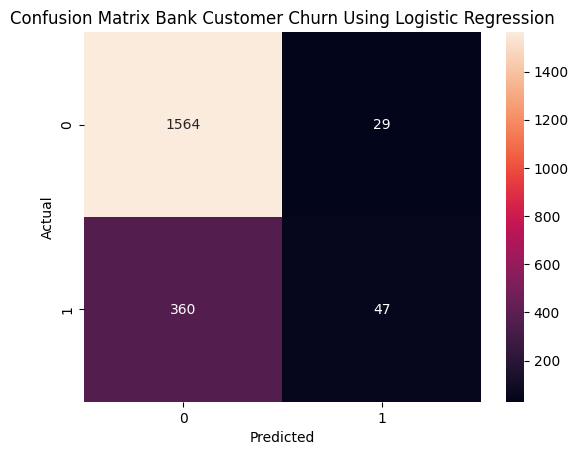

In [39]:
# Evaluasi dengan Confusion Matrix pada model Logistic Regression
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix Bank Customer Churn Using Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

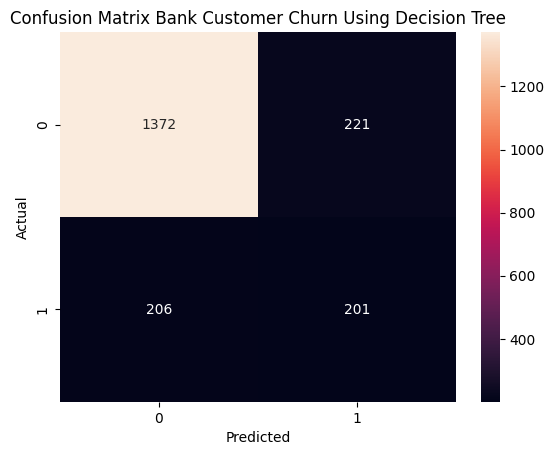

In [40]:
# Evaluasi dengan Confusion Matrix pada model Decision Tree
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix Bank Customer Churn Using Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

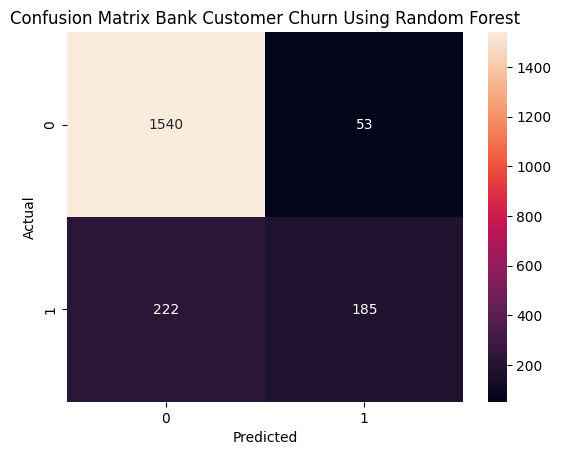

In [41]:
# Evaluasi dengan Confusion Matrix pada model Random Forest
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix Bank Customer Churn Using Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **ROC-AUC Curve**

Logistic Regression ROC AUC Score : 0.7713


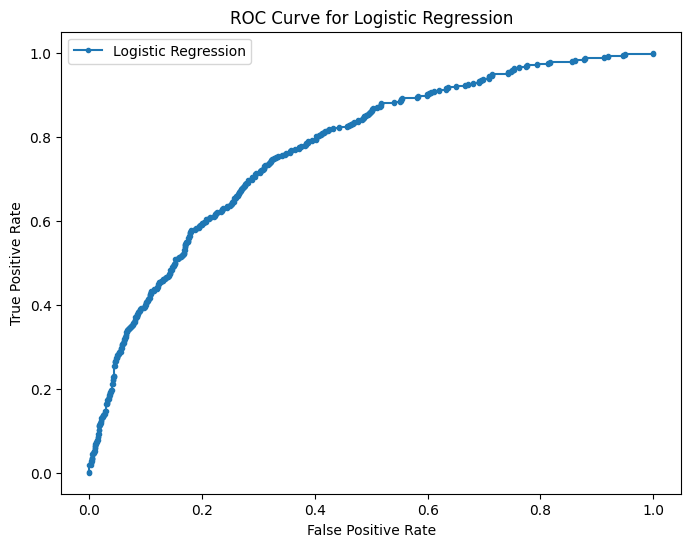

In [42]:
# Evaluasi ROC-AUC pada model Logistic Regression
lr_probs = lr_clf.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(f'Logistic Regression ROC AUC Score : {lr_auc:.4f}')

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

Decision Tree ROC AUC Score : 0.7713


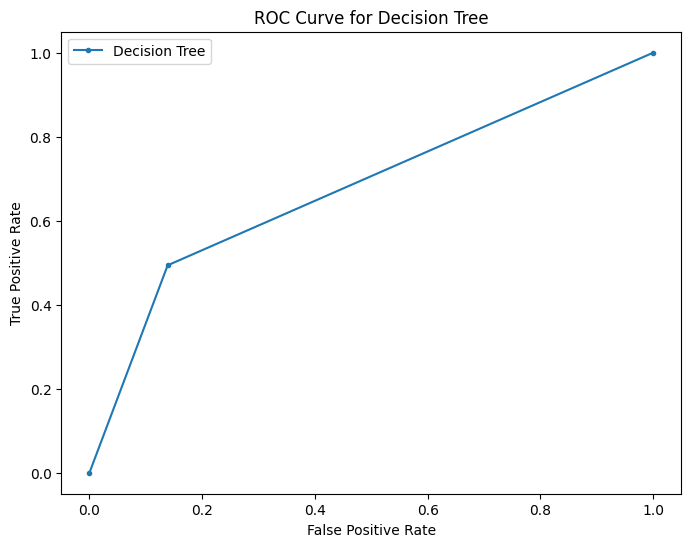

In [44]:
# Evaluasi ROC-AUC pada model Decision Tree
dt_probs = dt_clf.predict_proba(X_test)[::, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
print(f'Decision Tree ROC AUC Score : {lr_auc:.4f}')

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

Random Forest ROC AUC: 0.7713


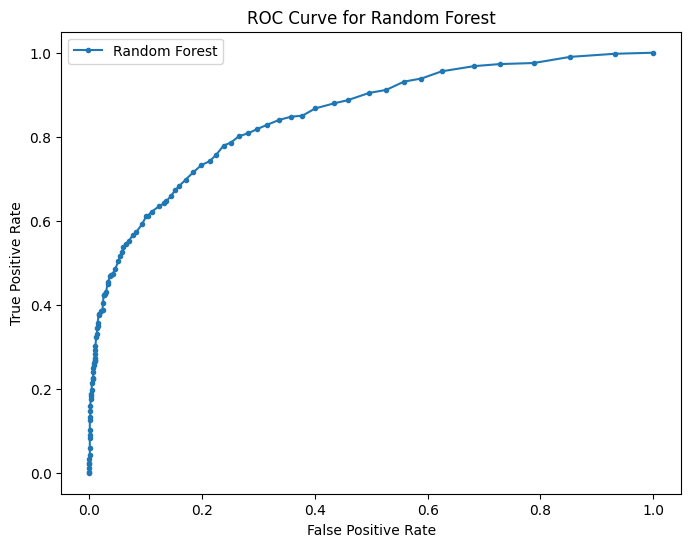

In [45]:
# Evaluasi ROC-AUC pada model Random Forest
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print(f'Random Forest ROC AUC: {lr_auc:.4f}')

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

### **Tree Visualization**

In [47]:
!pip -q install graphviz pydotplus

In [49]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

# Visualize the Decision Tree
dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['Not Churn', 'Churn'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

# Display the tree (optional, for smaller trees)
display(graphviz.Source(dot_data))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.458485 to fit



### **Feature Importance**

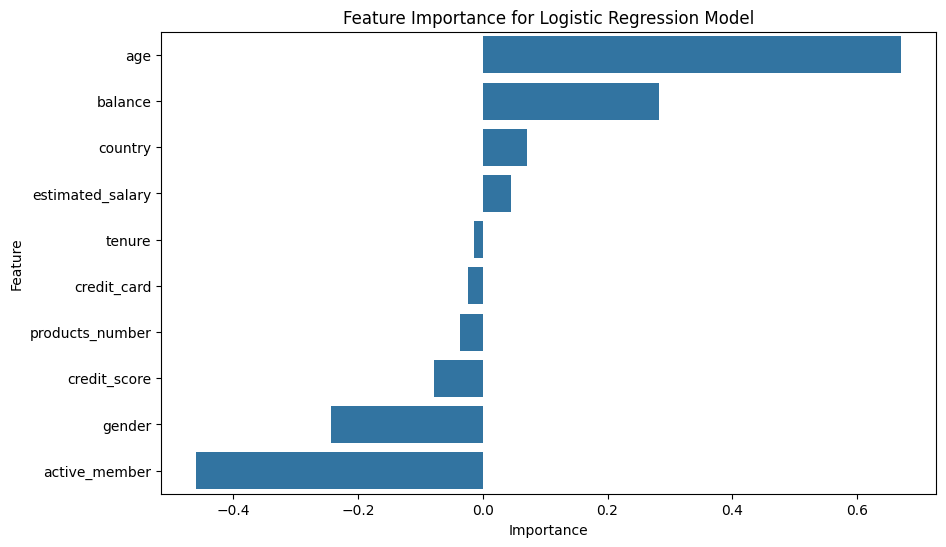

In [52]:
# Cek fitur terpenting yang menjadi acuan pada data target
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr_clf.coef_[0]})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)

# Visualisasi feature importance pada model Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

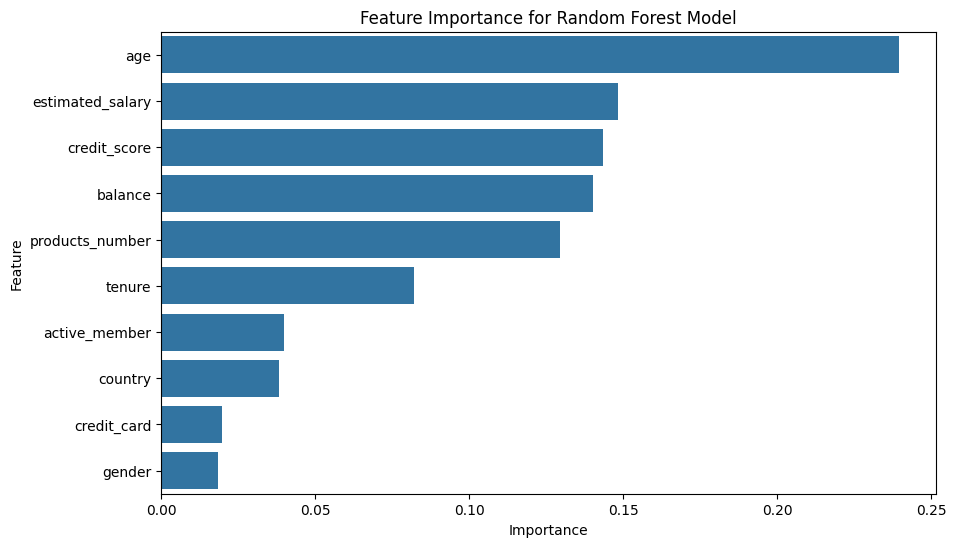

In [53]:
# Cek fitur terpenting yang menjadi acuan pada data target
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)

# Visualisasi feature importance pada model Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

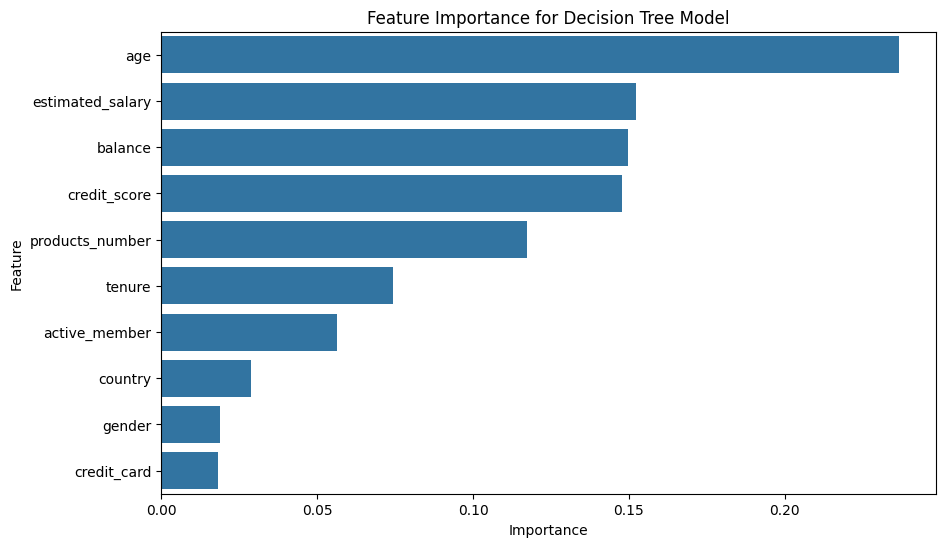

In [54]:
# Cek fitur terpenting yang menjadi acuan pada data target
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)

# Visualisasi feature importance pada model Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## **Save The Model**

In [55]:
# Simpan model dengan format pickle atau joblib
import pickle
pickle.dump(lr_clf, open('model_rf.pkl', 'wb'))

In [56]:
import joblib
joblib.dump(rf_clf, 'model_rf.sav')

['model_rf.sav']

## **Deployment**

In [57]:
# Load model pickle setelah disimpan
model_rf = pickle.load(open('model_rf.pkl', 'rb'))
# Prediksi dengan data
model_rf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
# Uji coba prediksi dengan data baru setelah di load model
# Membuat sebuah sampel pada data menyesuaikan pada kolom data yang dilatih
new_data = pd.DataFrame([[100, 0, 0, 30, 1, 600000, 2, 1, 1, 40000]], columns=X.columns)

# Scale data baru yang sama seperti proses data latih sebelumnya
new_data_scaled = scaler.transform(new_data)

# Buat prediksi berdasarkan model yang disimpan
prediction = model_rf.predict(new_data_scaled)

if prediction[0] == 1:
    print("Prediksi model bahwa Pelanggan termasuk dalam Churn.")
else:
    print("Prediksi model bahwa Pelanggan tidak termasuk dalam Churn.")

Prediksi model bahwa Pelanggan termasuk dalam Churn.


### **Deployment Using Gradio**

In [59]:
!pip -q install gradio

In [61]:
import joblib
import gradio as gr

loaded_model = joblib.load('/content/model_rf.sav')

def predict_churn(credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary):
    """
    Predicts customer churn based on input features.

    Args:
        credit_score (int): Customer's credit score.
        country (int): Customer's country (encoded).
        gender (int): Customer's gender (encoded).
        age (int): Customer's age.
        tenure (int): Customer's tenure.
        balance (int): Customer's balance.
        products_number (int): Number of products used by the customer.
        credit_card (int): Whether the customer has a credit card (1 for yes, 0 for no).
        active_member (int): Whether the customer is an active member (1 for yes, 0 for no).
        estimated_salary (int): Customer's estimated salary.

    Returns:
        str: A string indicating whether the customer is predicted to churn or not.
    """
    # Membuat sebuah dataframe baru yang telah diinput
    new_data = pd.DataFrame([[credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary]],
                            columns=X.columns)

    # Scale data baru yang dimasukkan
    new_data_scaled = scaler.transform(new_data)

    # Make a prediction using the loaded model (assuming loaded_lr_model is the desired model)
    prediction = loaded_model.predict(new_data_scaled)

    # Return a user-friendly result string
    if prediction[0] == 1:
        return "Prediksi model bahwa Pelanggan termasuk dalam Churn."
    else:
        return "Prediksi model bahwa Pelanggan tidak termasuk dalam Churn."

In [62]:
# Define input components
inputs = [
    gr.Number(label="Credit Score"),
    gr.Radio(choices=[(0, 'France'), (1, 'Germany'), (2, 'Spain')], label="Country"),
    gr.Radio(choices=[(0, 'Female'), (1, 'Male')], label="Gender"),
    gr.Number(label="Age"),
    gr.Number(label="Tenure"),
    gr.Number(label="Balance"),
    gr.Number(label="Products Number"),
    gr.Radio(choices=[(0, 'No'), (1, 'Yes')], label="Credit Card"),
    gr.Radio(choices=[(0, 'No'), (1, 'Yes')], label="Active Member"),
    gr.Number(label="Estimated Salary")
]

# Define output component
output = gr.Textbox(label="Prediction")

# Create Gradio interface
iface = gr.Interface(
    fn = predict_churn,
    inputs = inputs,
    outputs = output,
    title = "Bank Customer Churn Prediction",
    description = "Prediksi apabila Pelanggan atau Nasabah akan beresiko berdasarkan data atribut."
)

iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a23ddd1c16fab3e8f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


KeyboardInterrupt: 